In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import pandas as pd
import xarray as xr
import netCDF4 as nc
import cartopy as cp
# Coordinate Reference System
import cartopy.crs as ccrs
import cartopy.feature as cf

# Regional temperature and precipitation analysis. 
Use the data from 2000monthly-surft-prec.nc file. Select a 25x25 degree box around your favorite city (do not choose
Hamburg). Create the following plots:

• Averaged across the whole region temperature and precipitation as function of
time. Determine the warmest and driest month in 2000.

• 2000 temperature and precipitation variation. The temperature variation T var
is defined as
T var (x, y) = max T (x, y, t) − min T (x, y, t)
t
t
where t is time. The precipitation variation is defined similarly.

• Choose a particular location in the region (e.g. the central city). Scatter the
temperature vs precipitation

In [2]:
!ls

1990-2000monthly-surft-prec.nc	1996monthly-surft-prec.nc  Lab5_DAAO.pdf
1990monthly-surft-prec.nc	1997monthly-surft-prec.nc  Lab6-7_DAAO.pdf
1990s.tar.gz			1998monthly-surft-prec.nc  may2000-surf.nc
1991monthly-surft-prec.nc	1999monthly-surft-prec.nc  May2000-uvt.nc
1992monthly-surft-prec.nc	2000monthly-meant.nc	   updated_may_surf.nc
1993monthly-surft-prec.nc	2000monthly-surft-prec.nc  updated_may_uvt.nc
1994monthly-surft-prec.nc	Lab2.ipynb
1995monthly-surft-prec.nc	Lab4_DAAO.pdf


For all  exercises,  we first create a dictionary containing all the opened netCDF4-datasets:

In [3]:
fname_meant = "2000monthly-meant.nc"
fname_prec = "2000monthly-surft-prec.nc"
fname_may_surf = "may2000-surf.nc"
fname_may_uvt = "May2000-uvt.nc"

ds_dic = {fname_meant: xr.open_dataset(fname_meant),
          fname_prec: xr.open_dataset(fname_prec),
          fname_may_surf: xr.open_dataset(fname_may_surf),
          fname_may_uvt: xr.open_dataset(fname_may_uvt)}

For the first exercise, we choose the city of Berchtesgaden in the southeastern edge of Bavaria (compare coordinates in code). Precipitation and surface temperature data for the region can be found in the file *2000monthly-surft-prec.nc* by selecting a corresponding 25°x25° box. This is achieved by selecting first either precipitation or temperature as a variable and then slicing out the needed longitudes and latitudes. The region should be centered around Berchtesgaden, which is why we slice out data in $13° \pm 25/2°$ (longitude) and $47,6 °\pm 25/2°$. Then, zonal and meridional averages are applied before plotting the global spatial mean temperature and precipitation around Berchtesgaden in 2000.<br>
The warmest and driest months are determined with the help of the *idmax("time")* and *idmin("time")* option of *xarray* that allows to find the time index of the maximal or minimal value in the considered dataset. Here the warmest month is August and the driest one November.

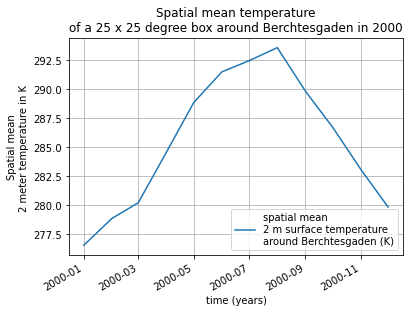

Warmest month is 2000-08-01T00:00:00.000000000


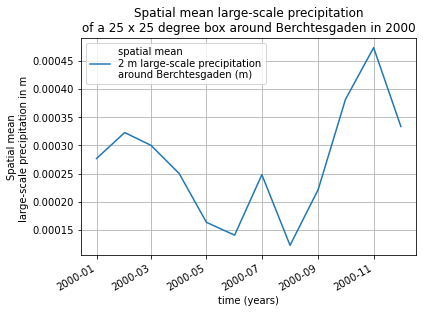

Driest month is 2000-11-01T00:00:00.000000000


In [4]:
coord_Berchtesgaden = [13,47.6]
ds_dic[fname_prec]["t2m"].sel(longitude=slice(round(coord_Berchtesgaden[0]-25/2),
                                              round(coord_Berchtesgaden[0] + 25/2)),
                              latitude=slice(round(coord_Berchtesgaden[1] + 25/2),
                                             round(coord_Berchtesgaden[1] - 25/2))).mean(dim=['longitude','latitude']).plot(label="spatial mean\n2 m surface temperature\naround Berchtesgaden (K)")
plt.title("Spatial mean temperature\nof a 25 x 25 degree box around Berchtesgaden in 2000")
plt.xlabel("time (years)")
plt.ylabel("Spatial mean\n2 meter temperature in K ")
plt.grid()
plt.legend()
plt.show()

print("Warmest month is",
      ds_dic[fname_prec]["t2m"].sel(longitude=slice(round(coord_Berchtesgaden[0]-25/2),
                                              round(coord_Berchtesgaden[0] + 25/2)),
                                    latitude=slice(round(coord_Berchtesgaden[1] + 25/2),
                                                   round(coord_Berchtesgaden[1] - 25/2))).mean(dim=['longitude','latitude']).idxmax("time").values)


ds_dic[fname_prec]["lsp"].sel(longitude=slice(round(coord_Berchtesgaden[0]-25/2),
                                              round(coord_Berchtesgaden[0] + 25/2)),
                              latitude=slice(round(coord_Berchtesgaden[1] + 25/2),
                                             round(coord_Berchtesgaden[1] - 25/2))).mean(dim=['longitude','latitude']).plot(label="spatial mean\n2 m large-scale precipitation\naround Berchtesgaden (m)")
plt.title("Spatial mean large-scale precipitation\nof a 25 x 25 degree box around Berchtesgaden in 2000")
plt.xlabel("time (years)")
plt.ylabel("Spatial mean\nlarge-scale precipitation in m ")
plt.grid()
plt.legend()
plt.show()
print("Driest month is",ds_dic[fname_prec]["lsp"].sel(longitude=slice(round(coord_Berchtesgaden[0]-25/2),
                                                                      round(coord_Berchtesgaden[0] + 25/2)),
                                                      latitude=slice(round(coord_Berchtesgaden[1] + 25/2),
                                                                     round(coord_Berchtesgaden[1] - 25/2))).mean(dim=['longitude','latitude']).idxmax("time").values)

The temperature and precipitation spatial variances are determined by finding the temporal maximal and minimal values in the selected region for all geographical locations. Both extremal values are subtracted one from each other as defined below to calculate the variance for each timestep:
$$T_{var}(x,y) = T_{max}(x,y,t) - T_{min}(x,y,t)$$
The obtained variance is plotted for both temperature and precipitation as a pcolormesh plot. Temperature variations are higher over the Greek peninsula than over Germany, while precipitation fluctuations are especially high over the north-west of Italy.

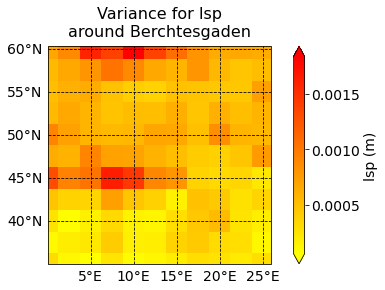

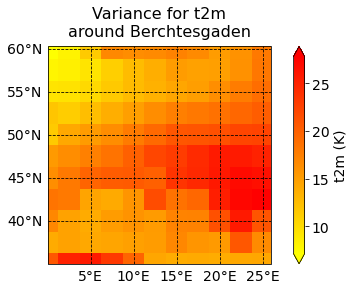

In [5]:
for var in ["lsp","t2m"]:
    fig = plt.figure(figsize=(8,4))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=coord_Berchtesgaden[0]))
    gl = ax.gridlines(color='k', linestyle='dashed', draw_labels=True)#,fontsize=14)
    gl.top_labels=False
    gl.right_labels=False
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 14}, {'fontsize': 14}
    ax.yaxis.tick_right() 
    ax.set_xlabel(xlabel="Longitude in degrees",fontsize= 14)
    ax.set_ylabel(ylabel="Latitude in degrees",fontsize= 14)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([round(coord_Berchtesgaden[0] - 25/2),
                   round(coord_Berchtesgaden[0]+25/2),
                   round(coord_Berchtesgaden[1] + 25/2),
                   round(coord_Berchtesgaden[1] - 25/2)])
    
    max_var = ds_dic[fname_prec][var].sel(longitude=slice(round(coord_Berchtesgaden[0]-25/2),
                                              round(coord_Berchtesgaden[0] + 25/2)),
                                           latitude=slice(round(coord_Berchtesgaden[1] + 25/2),
                                                          round(coord_Berchtesgaden[1] - 25/2))).max(dim="time")
    min_var = ds_dic[fname_prec][var].sel(longitude=slice(round(coord_Berchtesgaden[0]-25/2),
                                              round(coord_Berchtesgaden[0] + 25/2)),
                                          latitude=slice(round(coord_Berchtesgaden[1] + 25/2),
                                                         round(coord_Berchtesgaden[1] - 25/2))).min(dim="time")
    variance =  max_var - min_var
    v = variance.plot.pcolormesh(ax=ax, 
                             add_colorbar=False,#True
                             cmap="autumn_r",
                             #vmin=0,
                             #vmax=300,
                             transform=ccrs.PlateCarree())
    cbar1=plt.colorbar(v,cmap="autumn_r",extend="both")#,label=f"{var} (m)")
    cbar1.ax.tick_params(labelsize=14)
    cbar1.set_label(label=f"{var} ({ds_dic[fname_prec][var].units})",fontsize=14)
    plt.title(f"Variance for {var}\naround Berchtesgaden",fontsize=16)
    plt.show()

Precipitation and surface temperature values of Berchtesgaden are selected by entering the coordinates of the city and using the *nearest* method that tries to find the nearest gridpoint to Berchtesgaden. A scatter plot of surface temperature against precipitations data is created with this data based on the *matplotlib.pyplot* library. For very low temperatures, precipitation increases exponentially with temperature. After a maximum in precipitation for temperatures around $278~K$, the depency is reversed (i.e. precipitation decreases with rising temperatures, this time linearly).

/home/pierrot/anaconda3/envs/workenv/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/pierrot/anaconda3/envs/workenv/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/pierrot/anaconda3/envs/workenv/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/pierrot/anaconda3/envs/workenv/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated

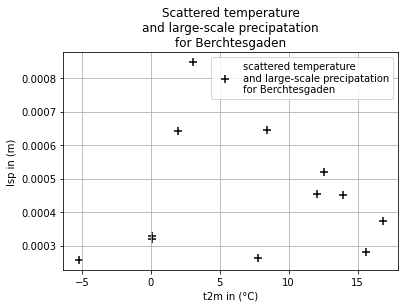

In [6]:
prec = ds_dic[fname_prec]["lsp"].sel(longitude=coord_Berchtesgaden[0],
                              latitude=coord_Berchtesgaden[1], method="nearest").values
temp = ds_dic[fname_prec]["t2m"].sel(longitude=coord_Berchtesgaden[0],
                              latitude=coord_Berchtesgaden[1], method="nearest").values
plt.scatter(temp-273.15,prec,marker="+",c="k",s=50,label="scattered temperature\nand large-scale precipatation\nfor Berchtesgaden")
plt.xlabel("t2m in (°C)")
plt.ylabel("lsp in (m)")
plt.title("Scattered temperature\nand large-scale precipatation\nfor Berchtesgaden")
plt.legend()
plt.grid()
plt.show()

# Storm detection 
For the purpose of this exercise we will classify as storm surface
wind exceeding 20 m/s. For the data use file ’May2000-uvt.nc’, which contains daily
wind and temperature for May 2000.

(a) Detect all the storm locations and plot them on the map, together with the
maximal wind speed and wind velocity arrows during the storm. Add geo-
graphical features to the plot to help identify storm locations.

(b) For each day compute the number of storm locations and plot the result as
function of time (all gridpoints where the wind exceeds the storm threshold
are considered different storm locations).

First the total windspeed is calculated by calculating the norm with the two vector components and added as a variable to the dataset:
$$ wind_{total} = \sqrt{u^2  + v^2} $$

In [7]:
ds_dic[fname_may_uvt]["total wind"] = np.sqrt((ds_dic[fname_may_uvt]["u"])**2 + (ds_dic[fname_may_uvt]["v"])**2)

Then, a variable containing all the timesteps of the total wind is created.

In [8]:
time_wind = ds_dic[fname_may_uvt]["total wind"]["time"]

Furthermore, all the datapoints corresponding to a storm are identified using the where-method, while the rest of the values are masked by assigning them *np.nan*. The resulting dataset is stored in *storm_mask*.

In [9]:
storm_mask = ds_dic[fname_may_uvt].where(np.sqrt((ds_dic[fname_may_uvt].u)**2 + (ds_dic[fname_may_uvt].v)**2)>20, np.nan)

To plot storm locations, wind speeds and wind directions for each timestep, a global map is generated using *cartopy*. Then a quiver plot displays the wind direction (arrow) and position (origin of the arrow), while the maximal wind speed for each storm is indicated by the length and the color of the arrow.

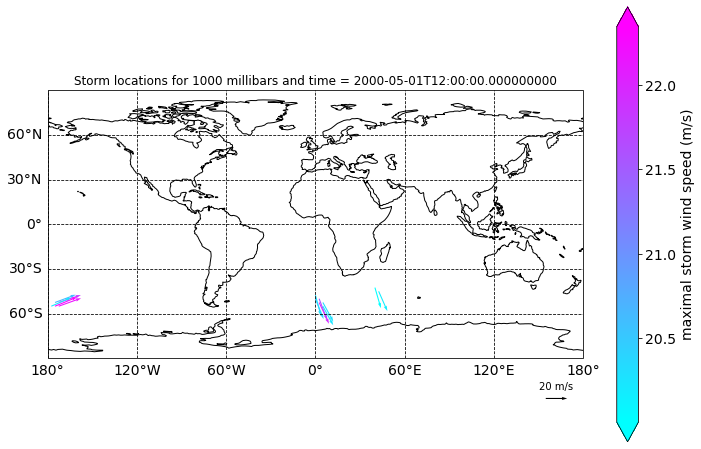

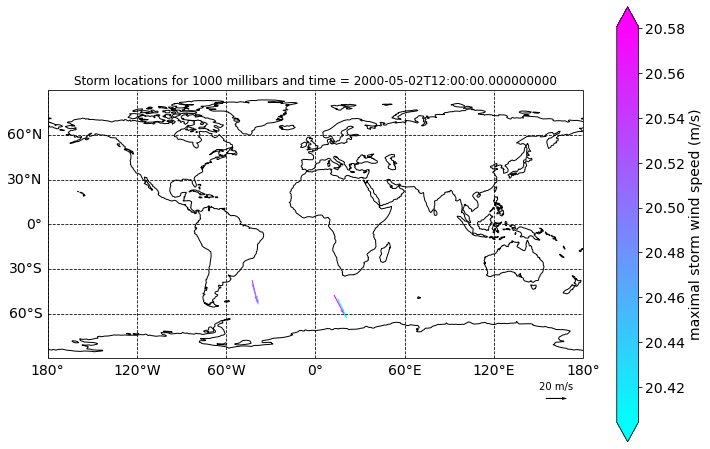

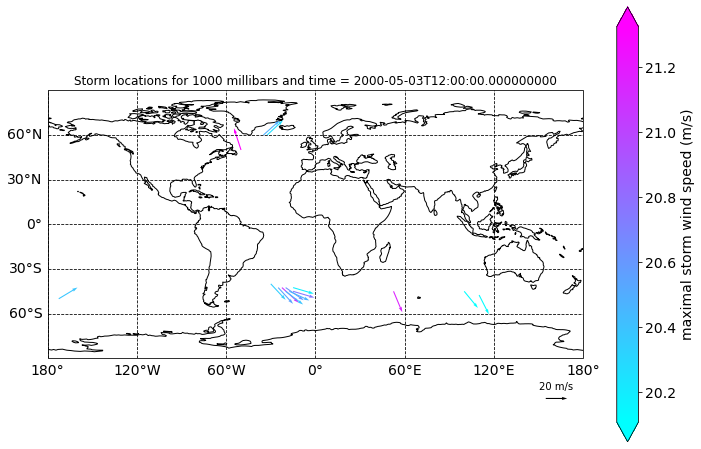

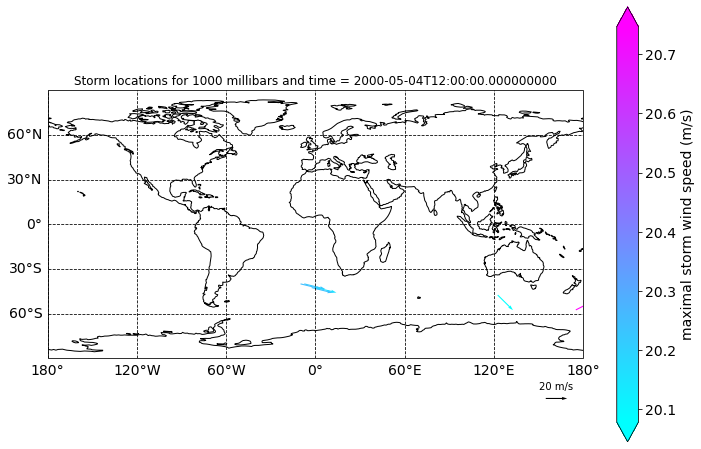

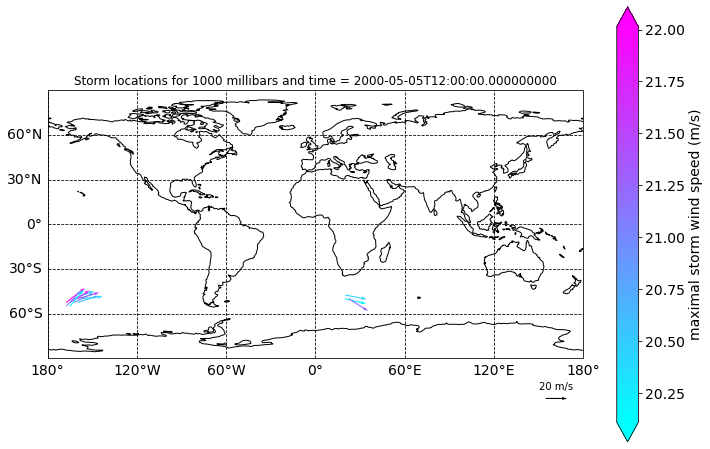

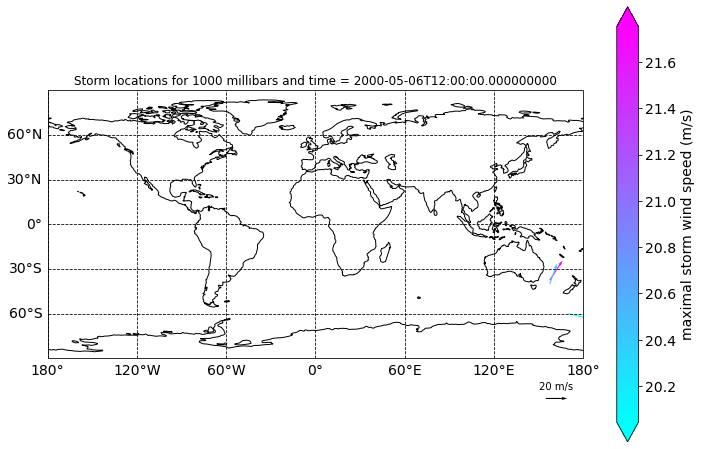

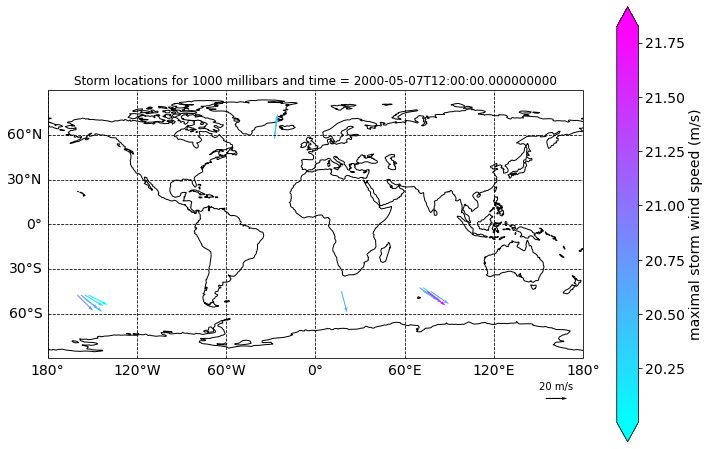

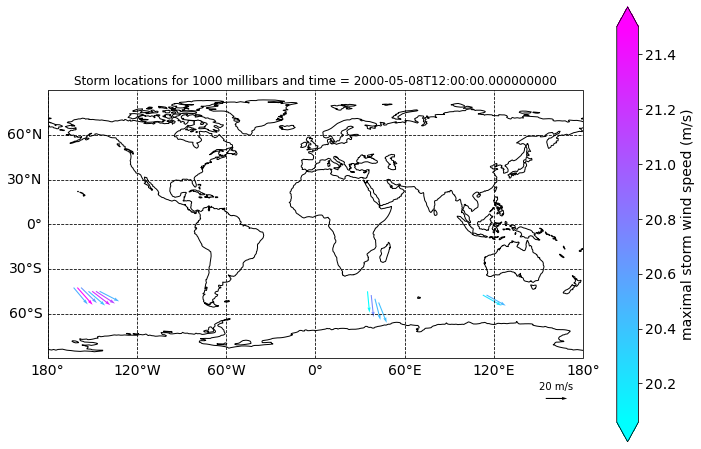

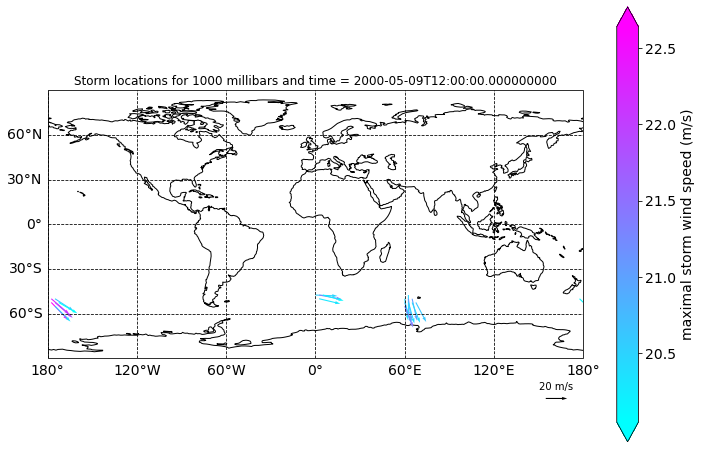

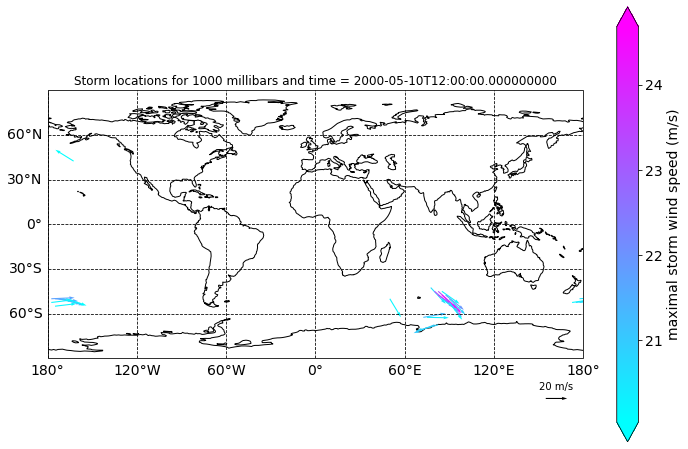

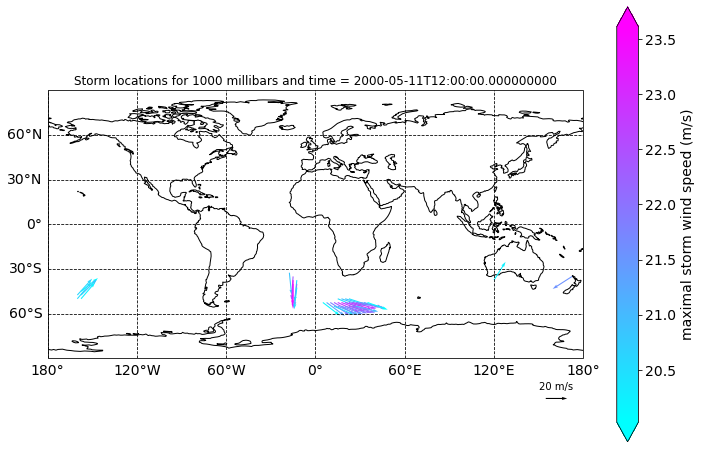

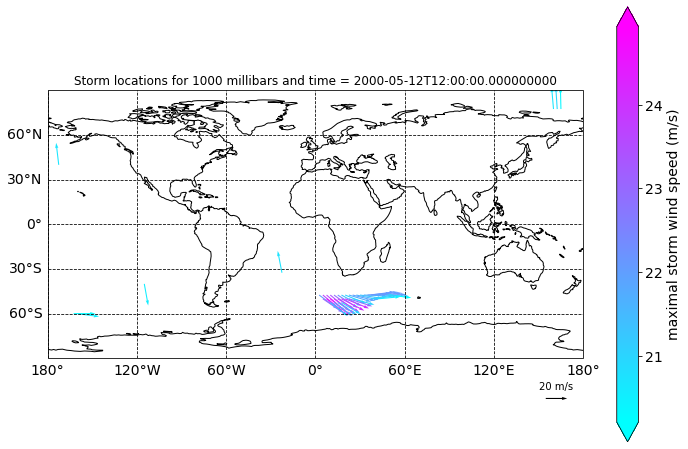

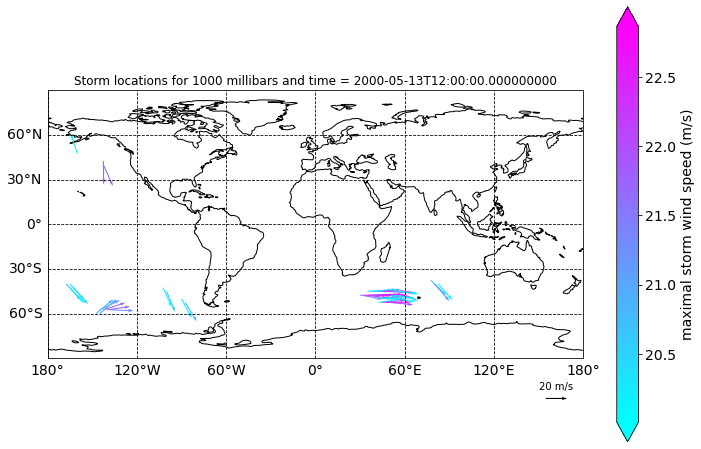

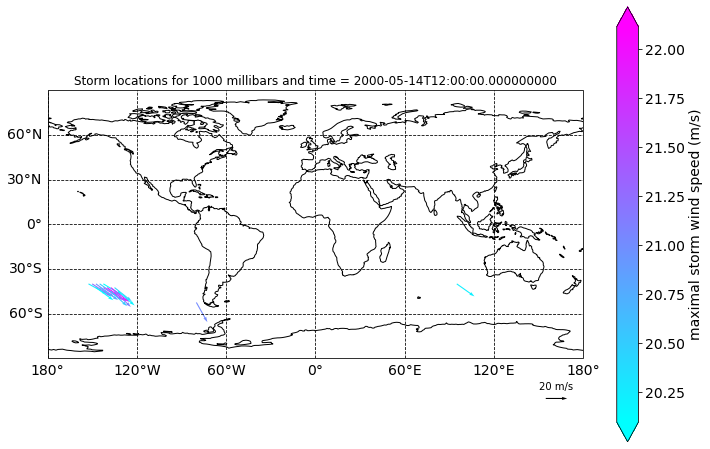

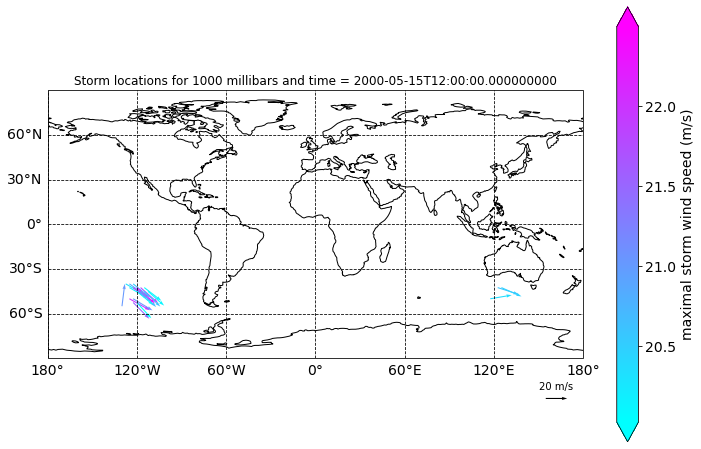

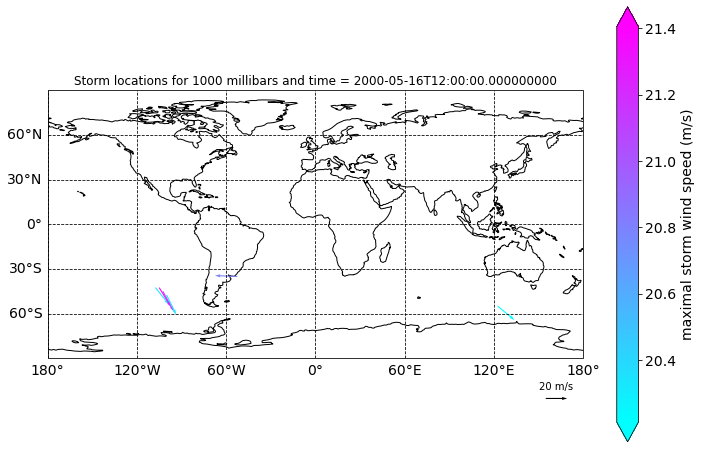

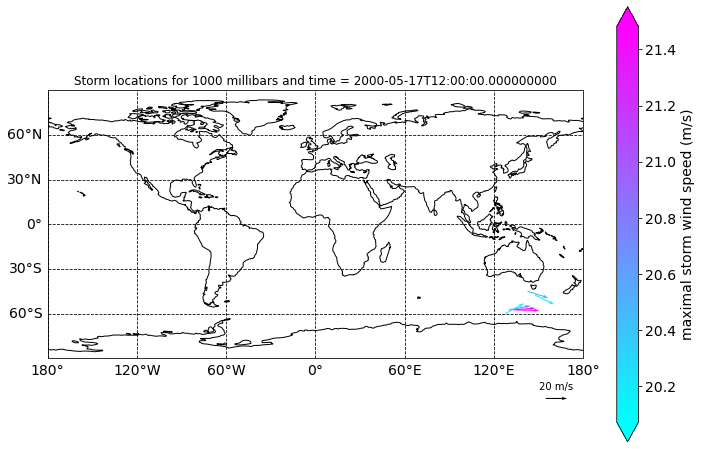

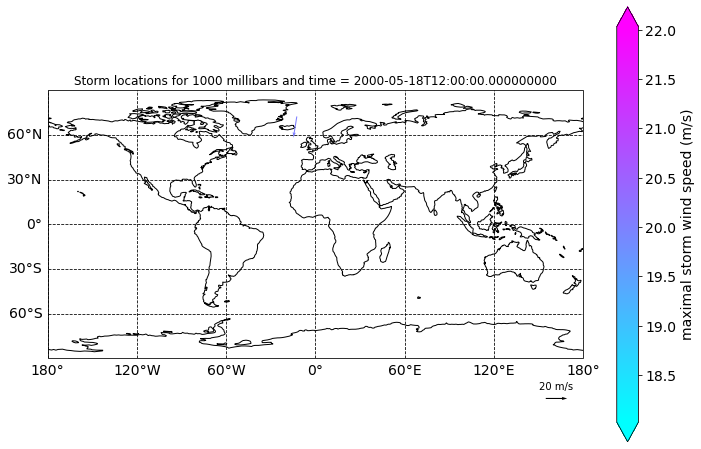

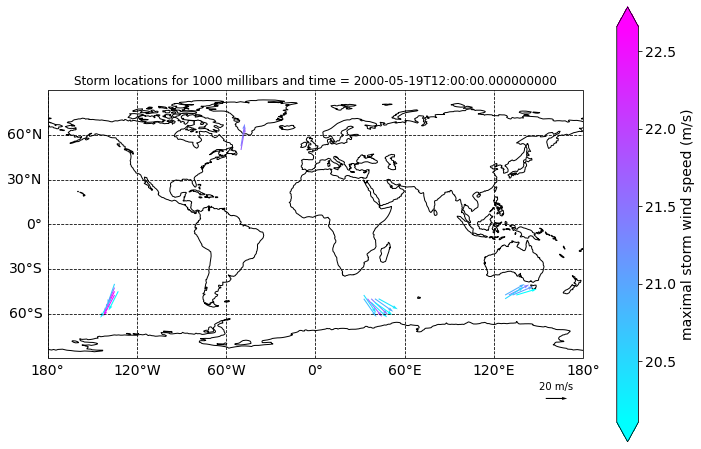

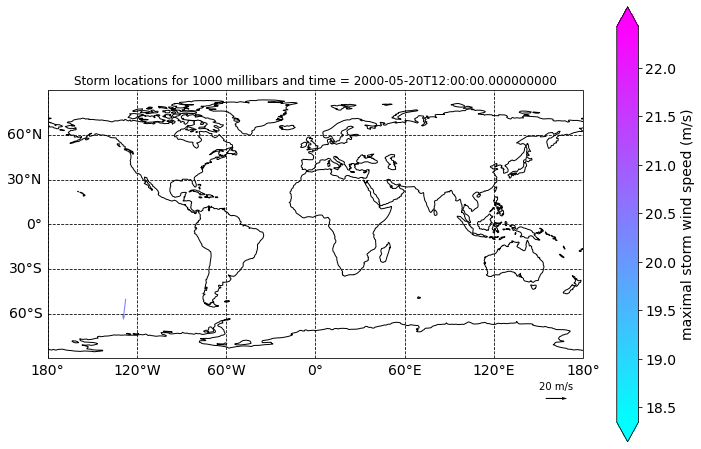

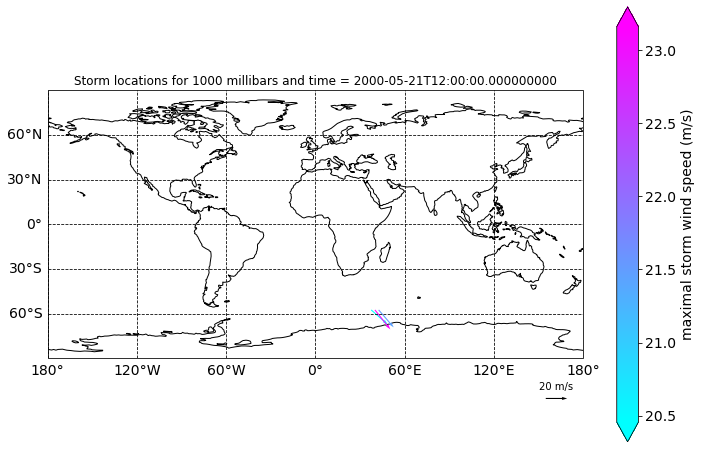

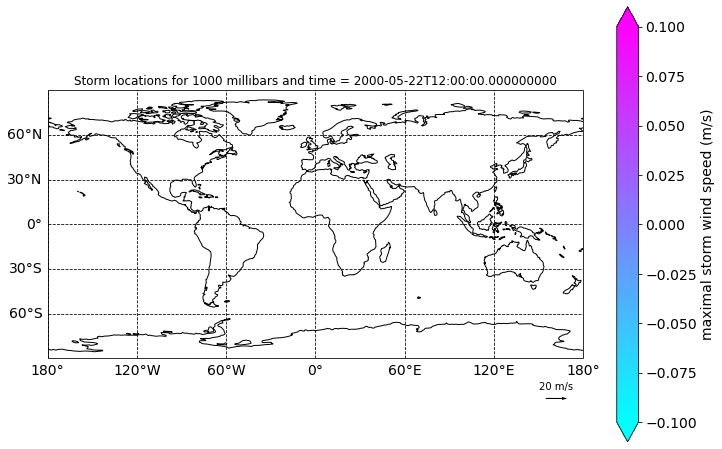

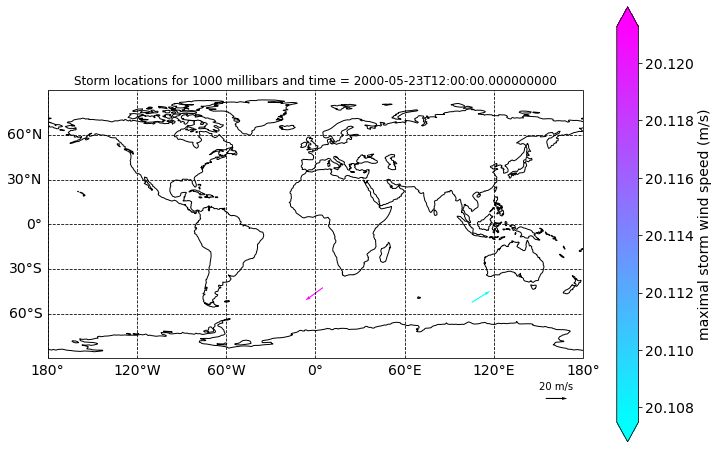

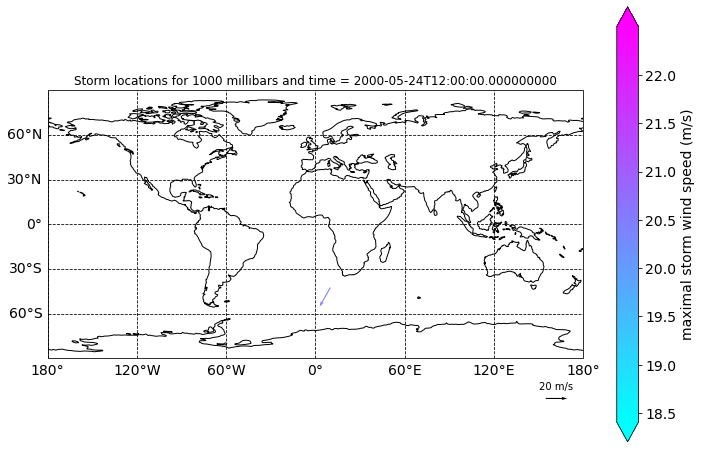

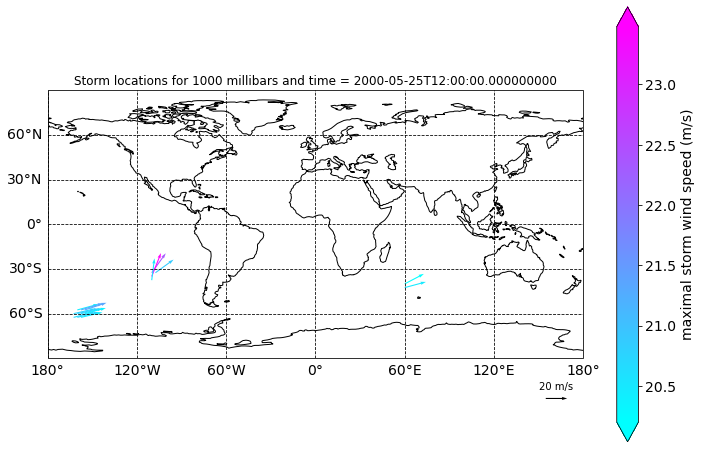

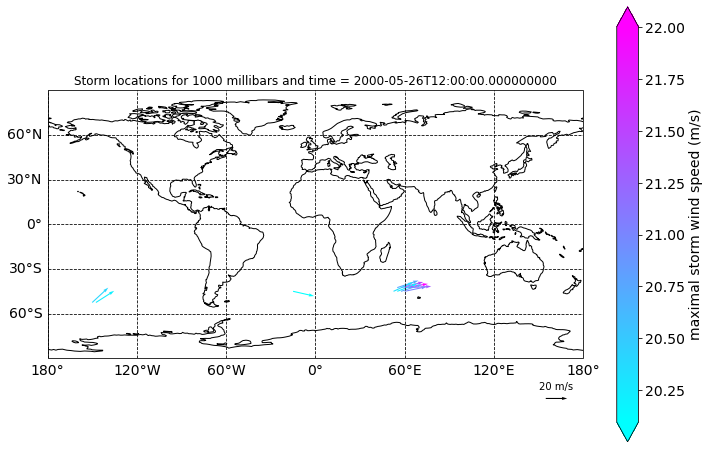

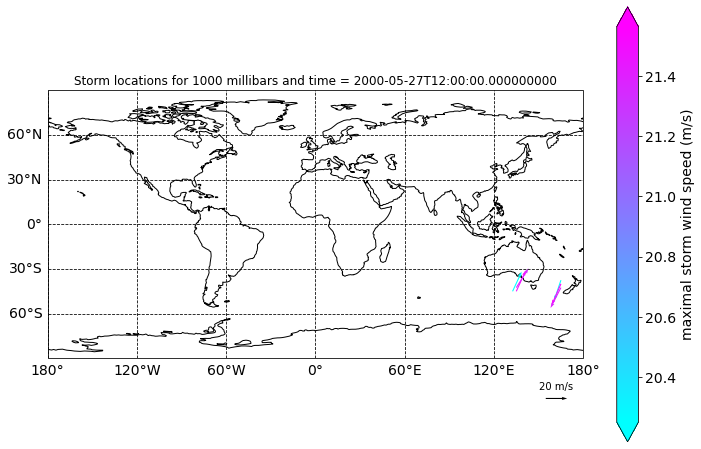

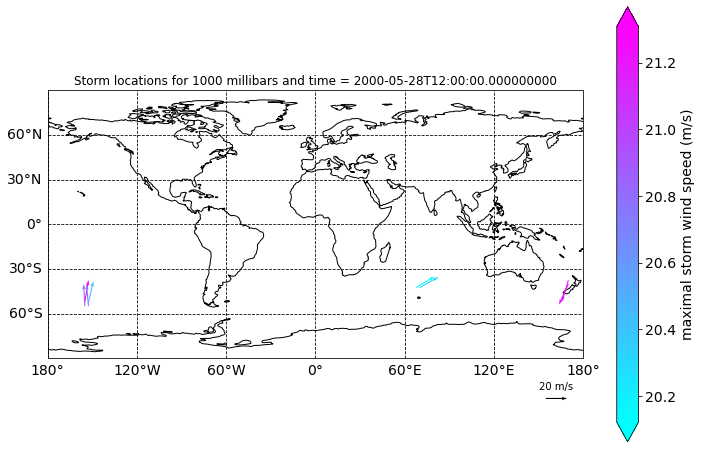

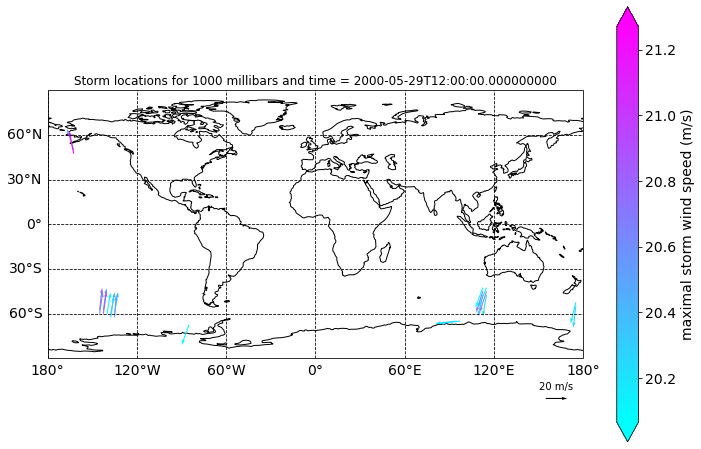

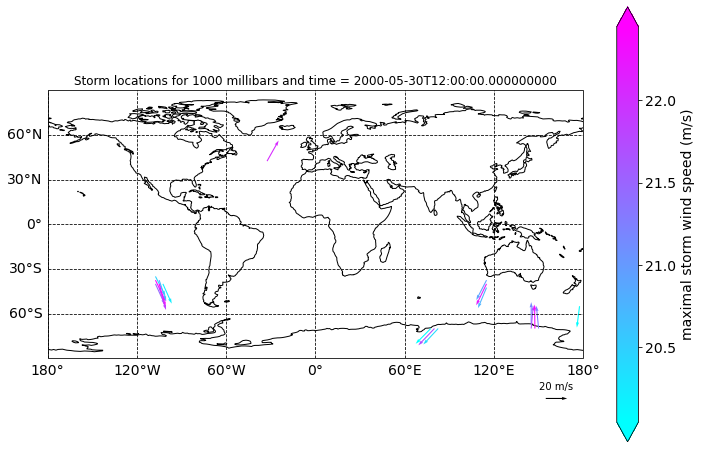

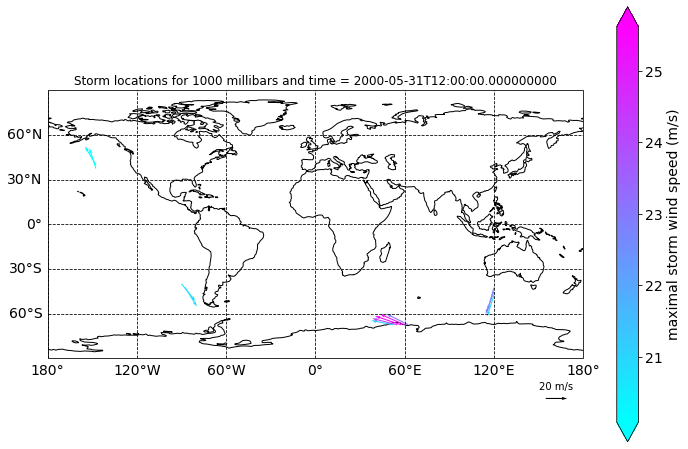

In [10]:
wind_drop = {}
for ti, t in enumerate(time_wind.values[::]):
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    gl = ax.gridlines(color='k', linestyle='dashed', draw_labels=True)#,fontsize=14)
    gl.top_labels=False
    gl.right_labels=False
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 14}, {'fontsize': 14}
    ax.yaxis.tick_right() 
    ax.set_xlabel(xlabel="Longitude in degrees",fontsize= 14)
    ax.set_ylabel(ylabel="Latitude in degrees",fontsize= 14)
    ax.add_feature(cf.COASTLINE)
    storm_mask_sel = storm_mask.sel(level=1000, time = t)

    wind_drop[t] = len(storm_mask_sel["total wind"].values[~(np.isnan(storm_mask_sel["total wind"].values))])

    qv = ax.quiver(storm_mask_sel.longitude,
                   storm_mask_sel.latitude,
                   storm_mask_sel.u,
                   storm_mask_sel.v,
                   storm_mask_sel["total wind"],
                   cmap="cool",
                   scale=500,
                   width=0.002)
    cbar2=plt.colorbar(qv,cmap="cool",extend="both")
    cbar2.ax.tick_params(labelsize=14)
    cbar2.set_label(label=f"maximal storm wind speed (m/s)",fontsize=14)
    Qkey=ax.quiverkey(qv, 0.95,-0.15, 20, "20 m/s")
    plt.title(f"Storm locations for 1000 millibars and time = {t}")
    ax.set_global()
    plt.show()
    
    

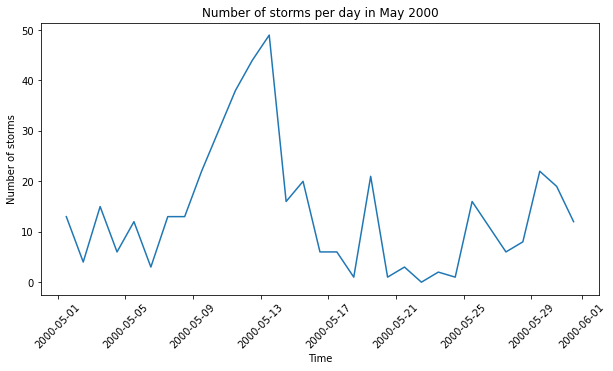

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(list(wind_drop.keys()),list(wind_drop.values()))
ax.set_ylabel("Number of storms")
ax.tick_params("x", labelrotation= 45)
ax.set_xlabel("Time")
ax.set_title("Number of storms per day in May 2000")
plt.show()

#  Global atmospheric circulation pattern

Compare average surface wind and
windspeed to the average wind and windspeed to the average wind and windspeed
at the top of the tropopause (pressure level 200 millibar) for the month of May 2000.
The daily values for the surface winds can be obtained from the may2000-surf.nc file,
variables u10 and v10. The daily values for the tropopause winds can be obtained
from file May2000-uvt.nc, u and v fields.

• Time average velocities and corresponding windspeeds and make two plots:
velocity quiver superimposed on windspeed at the surface and similar plot for
the level 200 millibars. Compare the results.<br>
• Provide titles, label the axis and plot geographical features so that the plot is
easier to read.<br>
• Add windspeed variable wspeed = u 2 + v 2 to the May2000-uvt.nc dataset
and save the updated dataset to a netCDF file.<br>

First of all, windspeed variable wspeed = u 2 + v 2 are added both to the *May2000-uvt.nc* dataset and to the *may2000-surf.nc* dataset.

In [12]:
ds_dic[fname_may_surf]["wspeed"] = np.sqrt(ds_dic[fname_may_surf]["u10"]**2 + ds_dic[fname_may_surf]["v10"]**2)
ds_dic[fname_may_uvt]["wspeed"] = np.sqrt(ds_dic[fname_may_uvt]["u"]**2 + ds_dic[fname_may_uvt]["v"]**2)

As the $200~mbar$ level is not provided, the top of the tropopause is considered to be at $250~mb$. On top of a cartopy global map plot without coastlines and borders, a *contourf* plot of the mean in time of *wspeed* is displayed. Mean *u* and *v* are combined in a quiver plot showing the mean tropopause wind direction in time. Only every 7th arrow is displayed for a better visibility.

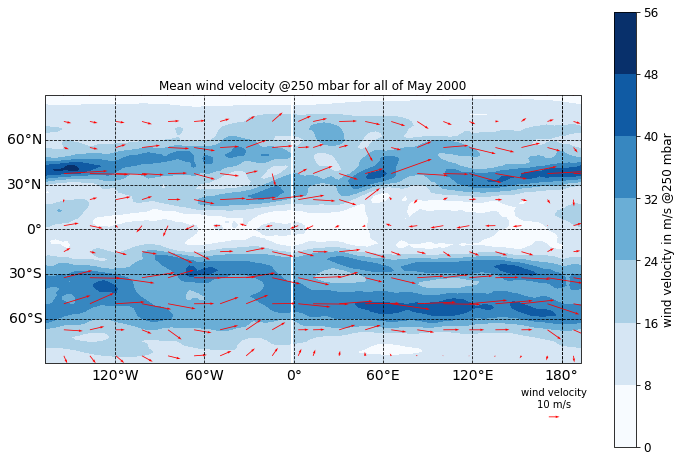

In [13]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=coord_Berchtesgaden[0]))
gl = ax.gridlines(color='k', linestyle='dashed', draw_labels=True)#,fontsize=14)
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style, gl.ylabel_style = {'fontsize': 14}, {'fontsize': 14}
ax.yaxis.tick_right() 
ax.set_xlabel(xlabel="Longitude in degrees",fontsize= 14)
ax.set_ylabel(ylabel="Latitude in degrees",fontsize= 14)
#ax.add_feature(cf.COASTLINE)
#ax.add_feature(cf.BORDERS)
surf = ds_dic[fname_may_uvt]["wspeed"].sel(level=250).mean(dim = "time").plot.contourf(ax=ax, 
                             add_colorbar=False,#True
                             cmap="Blues",
                             #vmin=0,
                             #vmax=300,
                             transform=ccrs.PlateCarree())
si = 7
qvsurf = ax.quiver(ds_dic[fname_may_uvt]["longitude"][::si],
                   ds_dic[fname_may_uvt]["latitude"][::si], 
                   ds_dic[fname_may_uvt]["u"].sel(level=250).mean(dim="time")[::si,::si], 
                   ds_dic[fname_may_uvt]["v"].sel(level=250).mean(dim="time")[::si,::si],
                   color = "red",
                   scale=500,
                   width=0.0015)
Qkey=ax.quiverkey(qvsurf, 0.95,-0.2, 10, "wind velocity\n10 m/s", coordinates="axes")
cb1=plt.colorbar(surf,cmap="Blues",extend="both")#,label=f"{var} (m)")
cb1.ax.tick_params(labelsize=12)
cb1.set_label(label=f"wind velocity in m/s @250 mbar",fontsize=12)
ax.set_title("Mean wind velocity @250 mbar for all of May 2000")
plt.show()

Similarly, a mean in time of the total surface wind velocity (contourf) is plotted below the surface wind direction (quiver). This time, every 3rd arrow is displayed for better visibility.

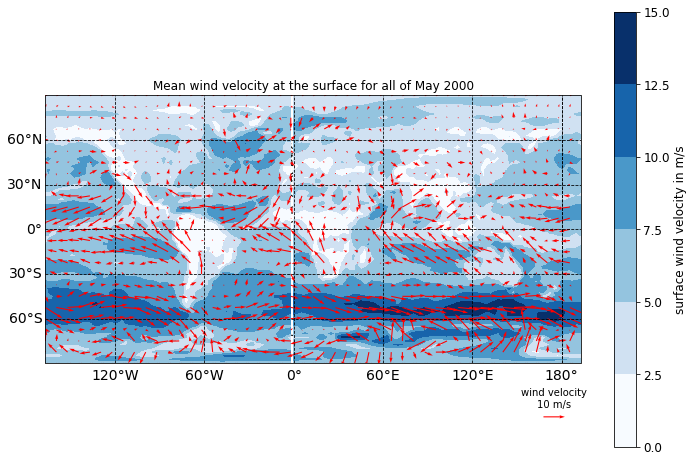

In [14]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=coord_Berchtesgaden[0]))
gl = ax.gridlines(color='k', linestyle='dashed', draw_labels=True)#,fontsize=14)
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style, gl.ylabel_style = {'fontsize': 14}, {'fontsize': 14}
ax.yaxis.tick_right() 
ax.set_xlabel(xlabel="Longitude in degrees",fontsize= 14)
ax.set_ylabel(ylabel="Latitude in degrees",fontsize= 14)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
surf = ds_dic[fname_may_surf]["wspeed"].mean(dim = "time").plot.contourf(ax=ax, 
                             add_colorbar=False,#True
                             cmap="Blues",
                             #vmin=0,
                             #vmax=300,
                             transform=ccrs.PlateCarree())
si = 3
qvsurf = ax.quiver(ds_dic[fname_may_surf]["longitude"][::si],
                   ds_dic[fname_may_surf]["latitude"][::si], 
                   ds_dic[fname_may_surf]["u10"].mean(dim="time")[::si,::si], 
                   ds_dic[fname_may_surf]["v10"].mean(dim="time")[::si,::si],
                   color = "red",
                   scale=250,
                   width=0.002)
Qkey=ax.quiverkey(qvsurf, 0.95,-0.2, 10, "wind velocity\n10 m/s", coordinates="axes")
cb1=plt.colorbar(surf,cmap="Blues",extend="both")#,label=f"{var} (m)")
cb1.ax.tick_params(labelsize=12)
cb1.set_label(label=f"surface wind velocity in m/s",fontsize=12)
ax.set_title("Mean wind velocity at the surface for all of May 2000")
plt.show()

As can be seen in the 2 previous plots, the tropopause wind is reaching higher speeds on average compared to the surface wind in May 2000. Topography clearly slows down the surface wind, while the tropospheric one shows to high speed zonal bands between 30°-60° north and south of the equator. The ITCZ as well as characteristic cross equatorial wind of the Monsoon can both be seen at the surface.

The datasets containing the new variable *wspeed* are now exported as 2 new files.

In [15]:
ds_dic[fname_may_surf].to_netcdf("updated_may_surf.nc")
ds_dic[fname_may_uvt].to_netcdf("updated_may_uvt.nc")

# Seasonal temperature and precipitation patterns

• Compute seasonal zonally averaged (i.e. averaged over a season and latitude
circles ) temperature and precipitation. Plot the results for each season as
function of latitude. What is the wettest season in equatorial region?

• Find the regions with greatest inter-seasonal temperature variability. For that,
compute inter-seasonal variability for each location and plot over the map for
each season. In which season the greatest variations are observed? Inter-
seasonal variability for a season is defined as
maxT (t) − minT (t) for t in Season
Note : For winter, combine December 2000 with January and February.
Hint: use data.roll to simplify your life.

In [16]:
time_4 = ds_dic[fname_prec]["lsp"]["time"]

In order to compute the seasonal zonally averaged temperature and precipitation, a mean along the longitudinal dimension is taken for both variables. Then the zonally averaged variable is coarsened, so that 4 blocks of 3 months are created. Finally, a temporal mean over those seasonal blocks is taken and plotted as a function of latitude.

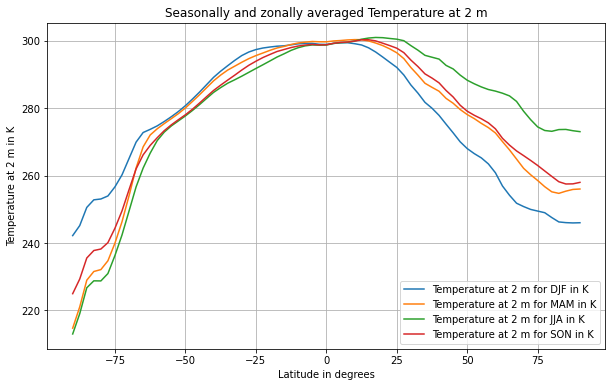

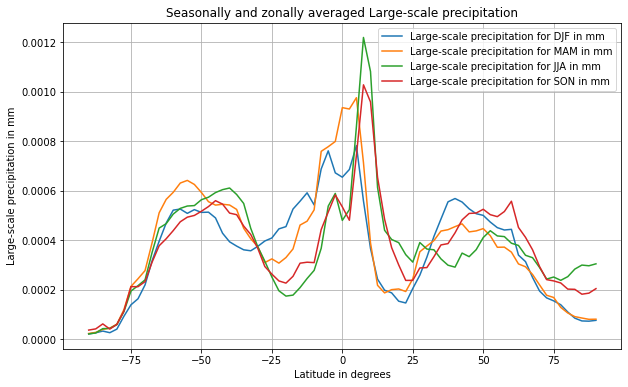

In [17]:
for k,kn,u in zip(["t2m","lsp"],["Temperature at 2 m","Large-scale precipitation"],["K","mm"]):
    fig, ax = plt.subplots(figsize=(10,6))
    var = ds_dic[fname_prec][k].roll(time=1).mean(dim="longitude")
    var_c = var.coarsen(time=3)
    var_m = var_c.mean()
    for t,s in zip(var_m.time,["DJF", "MAM", "JJA", "SON"]): 
        ax.plot(var_m.latitude, var_m.sel(time=t),label=f"{kn} for {s} in {u}")#
    ax.set_title(f"Seasonally and zonally averaged {kn}")
    ax.set_ylabel(f"{kn} in {u}")
    ax.set_xlabel(f"Latitude in degrees")
    ax.grid()
    ax.legend()
    plt.show()

The wettest season in the equatorial region is MAM (March, April, May), i.e. spring

For each variable (precipitation and temperature), seasonal blocks are created again. This time, the minimum and maximum of each block (season) is found before taking the difference between max and min to calculate the interseasonal variability for each season. A *contourf*-plot of this new variable is then created for each season.

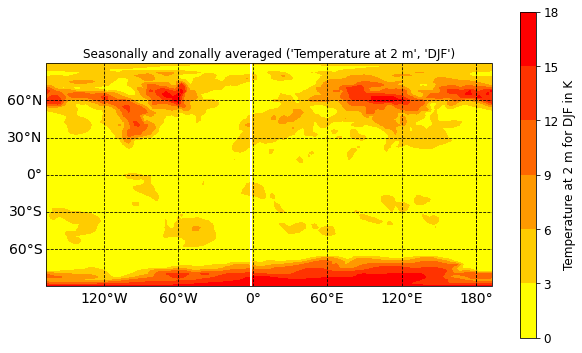

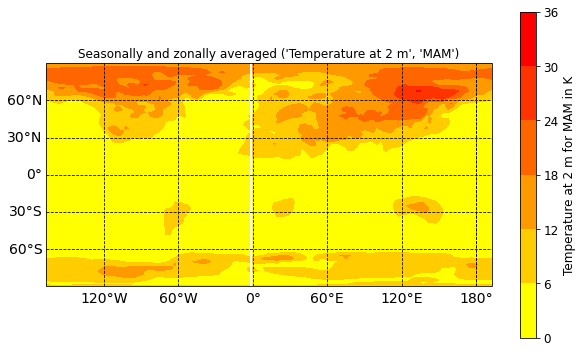

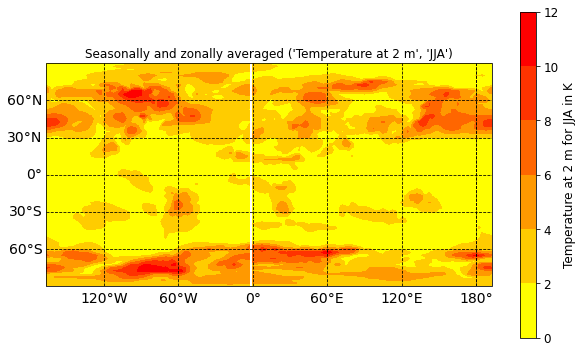

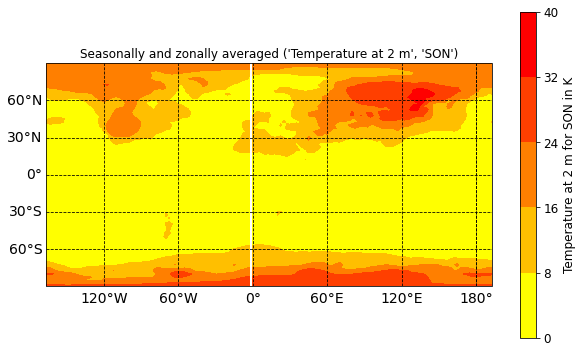

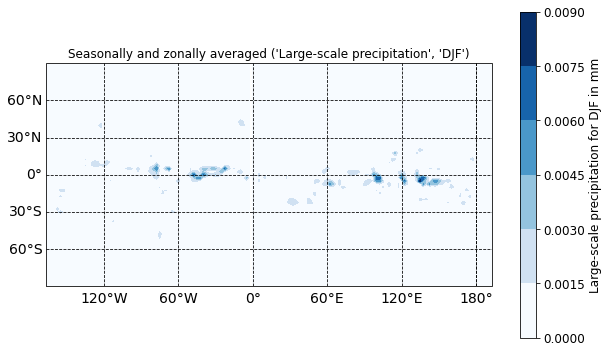

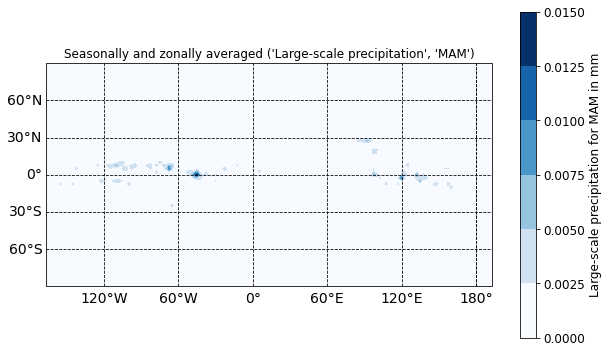

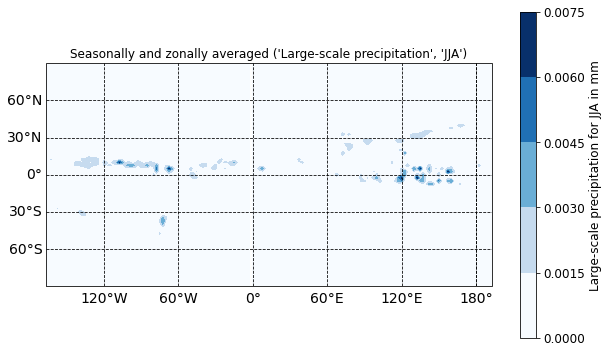

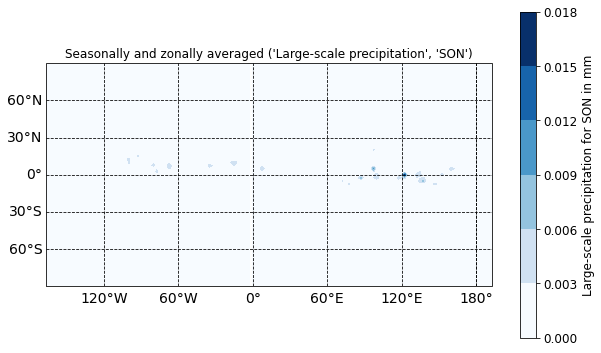

In [18]:
for k,kn,u,cm in zip(["t2m","lsp"],["Temperature at 2 m","Large-scale precipitation"],["K","mm"],["autumn_r","Blues"]):
        
    var = ds_dic[fname_prec][k].roll(time=1)
    var_c = var.coarsen(time=3)
    var_max = var_c.max() 
    var_min = var_c.min() 
    inter_var = var_max - var_min
    for t,s in zip(inter_var.time,["DJF", "MAM", "JJA", "SON"]): 
        fig = plt.figure(figsize=(10,6))
        ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=coord_Berchtesgaden[0]))
        gl = ax.gridlines(color='k', linestyle='dashed', draw_labels=True)#,fontsize=14)
        gl.top_labels=False
        gl.right_labels=False
        gl.xlabel_style, gl.ylabel_style = {'fontsize': 14}, {'fontsize': 14}
        ax.yaxis.tick_right() 
        ax.set_xlabel(xlabel="Longitude in degrees",fontsize= 14)
        ax.set_ylabel(ylabel="Latitude in degrees",fontsize= 14)
        #ax.add_feature(cf.COASTLINE)
        #ax.add_feature(cf.BORDERS)
        
        inter_vari_plot = inter_var.sel(time = t).plot.contourf(ax=ax,
                               add_colorbar = False,
                               cmap = cm,
                               transform=ccrs.PlateCarree())
        cb1=plt.colorbar(inter_vari_plot,cmap=cm,extend="both")#,label=f"{var} (m)")
        cb1.ax.tick_params(labelsize=12)
        cb1.set_label(label=f"{kn} for {s} in {u}",fontsize=12)
        ax.set_title(f"Seasonally and zonally averaged {kn,s}")
    #ax.set_ylabel(f"{kn} in {u}")
    #ax.set_xlabel(f"Latitude in degrees")
        plt.show()

For both temperature and precipitation, the greatest interseasonal variability is observed in autumn (SON).

# Merging netCDFs and decadal trends 

Download provided file 1990s.tar.gz
which contains monthly surface temperature and precipitation data for 1990s, in
the same format as the file 2000monthly-surft-prec.nc . Unpack the file into the lab
directory.<br>
• Now merge the datasets from files 1990monthly-surft-prec.nc, .... ,2000monthly-
surft-prec.nc into a single dataset. Save the merged dataset to the file of your
choice.<br>
Hint You can generate the file names for the datasets by looping through the
years and using
fname=str(yy)+monthly-surft-prec.nc
where yy stands for integer year (e.g. 1999).<br>
• Study the decadal trends by computing the globaly averaged surface temper-
ature and precipitation as a function of time.<br>
• Then demonstrate climatological trends by computing zonal averages of mean
temperature and precipitation for each year and plotting the results in a way
that exposes trends (for instance plotting differences between data for 1990
and subsequent years on a 2D plot in year x latitude coordinates or any other
representation that you find revealing).

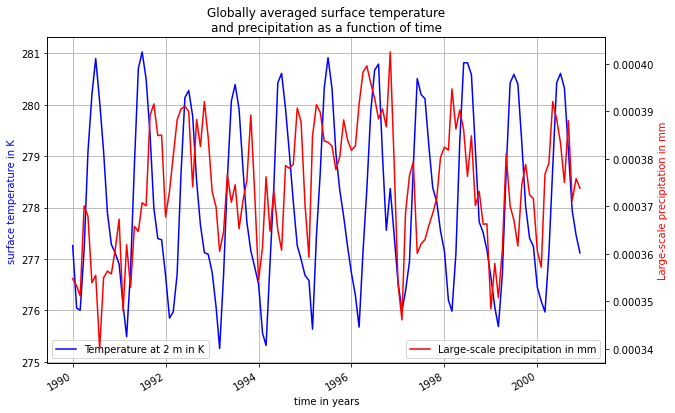

In [19]:
end_name = "monthly-surft-prec.nc"
fname = [xr.open_dataset(str(yy)+ end_name) for yy in np.arange(1990,2001)]

ds_merge = xr.merge(fname)
ds_merge.to_netcdf("1990-2000"+end_name)

fig, ax1 = plt.subplots(figsize=(10,6))
ax_twin = ax1.twinx()

for k,kn,u,axi,col in zip(["t2m","lsp"],["Temperature at 2 m","Large-scale precipitation"],["K","mm"],[ax1,ax_twin],["blue","red"]):
    ds_merge[k].mean(dim=["latitude","longitude"]).plot(label=f"{kn} in {u}",ax=axi,c=col)
ax1.set_title("Globally averaged surface temperature\nand precipitation as a function of time")
ax1.set_xlabel("time in years")
ax1.set_ylabel("surface temperature in K",c="blue")
ax_twin.set_ylabel("Large-scale precipitation in mm",c="red")
ax1.grid()
ax1.legend(loc="lower left")
ax_twin.legend(loc="lower right")
plt.show()

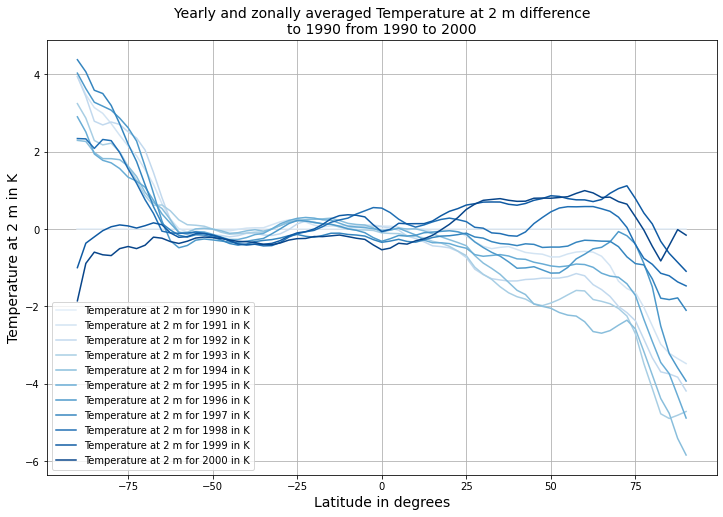

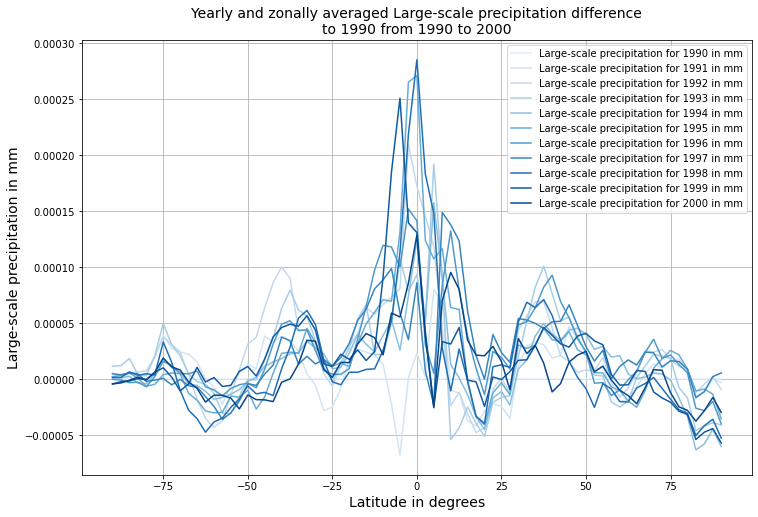

In [20]:
year_list = list(pd.DatetimeIndex(ds_merge["time"].values).year)[::12]

cmap = plt.cm.get_cmap('Blues')

rgba = cmap(np.linspace(0.1,1,12))

var = ds_merge.roll(time=1).mean(dim="longitude")
var_c = var.coarsen(time=11)
var_m = var_c.mean()
var_ref = var_m.isel(time=0)
var_comp = var_m - var_ref

for k,kn,u in zip(["t2m","lsp"],["Temperature at 2 m","Large-scale precipitation"],["K","mm"]):
    fig, ax = plt.subplots(figsize=(12,8))
 
    
    for t,y,cm in zip(var_m.time,year_list,rgba): 
        
        ax.plot(var_comp[k].latitude, var_comp[k].sel(time=t),label=f"{kn} for {y} in {u}",c = cm)#
        
    ax.set_title(f"Yearly and zonally averaged {kn} difference\nto 1990 from {min(year_list)} to {max(year_list)}",fontsize=14)
    ax.set_ylabel(f"{kn} in {u}",fontsize=14)
    ax.set_xlabel(f"Latitude in degrees",fontsize=14)
    ax.grid()
    ax.legend()
    plt.show()